In [82]:
import PIL
from IPython import display
import os
import datetime
import numpy
import pandas
import random

In [204]:
mutationRate = 0.004
popSize = 200
poolSize = 30
fitnessLimit = 7500
sourceFilename = "batavia.png"
filename = "ML.png"

def run():
    start = datetime.datetime.now()
    target = PIL.Image.open(sourceFilename)
    display.display(display.Image(filename=sourceFilename))
    
    targetDNA = list(target.getdata())
    population = createPopulation(targetDNA)
    
    found = False
    generation = 0
    while found is False :
        generation += 1
        bestOrganism = getBest(population)
        if bestOrganism.Fitness < fitnessLimit:
            found = True
        else:
            pool = createPool(population)
            population = naturalSelection(pool, population, targetDNA)
            
            if generation%50 == 0:
                sofar = datetime.datetime.now()
                
                print("Generation " + str(generation))
                print("Time taken so far: " + str((sofar-start).total_seconds()))
            
                save(filename, target, bestOrganism.DNA)
                display.display(display.Image(filename=filename))
    
    
def createPopulation(targetDNA):
    population = []
    for i in range(popSize):
        population.append(createOrganism(targetDNA))
    
    return population

def createOrganism(targetDNA):
    startCreate = datetime.datetime.now()
    organism = Organism(createRandomImageFrom(targetDNA))
    endCreate = datetime.datetime.now()
#     print("Create organism duration : " + str((endCreate-startCreate).total_seconds()))
    organism.setFitness(calcFitness(organism.DNA, targetDNA))
    endSetFitness = datetime.datetime.now()
#     print("Set Fitness duration : " + str((endSetFitness-endCreate).total_seconds()))
    
    return organism

def calcFitness(DNA, targetDNA):
    difference = diff(DNA, targetDNA)
    return difference

def diff(a, b):
    d = 0
    for i in range(len(a)):
        d += squareDifference(a[i], b[i])
    return d

def squareDifference(x, y):  
    d = (x[0]-y[0])+(x[1]-y[1])+(x[2]-y[2])
    return d*d
    
def createRandomImageFrom(targetDNA):
    startCreateImage = datetime.datetime.now()
    DNA = list()
    for i in range(len(targetDNA)):
        DNA.append(tuple(random.sample(range(256),3)))
    endCreateImage = datetime.datetime.now()
#     print("Create Image duration : " + str((endCreateImage-startCreateImage).total_seconds()))
    return DNA

def getBest(population):
    best = 0
    index = 0
    for i in range(len(population)):
        if population[i].Fitness > best :
            index = i
            best = population[i].Fitness
    
    return population[index]

def createPool(population):
    pool = []
    population.sort(key=lambda x: x.Fitness)
    top = population[0:poolSize+1]
    
    if top[-1].Fitness-top[0].Fitness == 0:
        pool = population
        print("population is stable")
        return pool
    
    for i in range(len(top)):
        num = (top[poolSize].Fitness - top[i].Fitness)
        for j in range(num):
            pool.append(top[i])
            
    return pool

def naturalSelection(pool, population, targetDNA):
    next = []
    for i in range(len(population)):
        r1, r2 = random.sample(range(len(pool)),2)
        a = pool[r1]
        b = pool[r2]
        
        child = crossover(a,b)
        child = mutate(child)
        child.setFitness(calcFitness(child.DNA, targetDNA))
        
        next.append(child)
    
    return next
        
def crossover(a,b):
    DNA = []
    mid = random.randint(0, len(a.DNA))
    for i in range(len(a.DNA)):
        if i > mid:
            DNA.append(a.DNA[i])
        else:
            DNA.append(b.DNA[i])
    child = Organism(DNA)
    
    return child

def mutate(organism):
    for i in range(len(organism.DNA)):
        if random.uniform(0,1) < mutationRate:
            organism.mutateNucleotide(i, tuple(random.sample(range(256), 3)))
    
    return organism

def save(filename, target, DNA):
    img = PIL.Image.new('RGB', target.size)
    img.putdata(DNA)
    img.save(filename)
    
    return filename
    
class Organism(object):
    def __init__(self, DNA):
        self._DNA = DNA
        self.Fitness = 0
    
    @property
    def DNA(self):
        return self._DNA
    
    def Fitness(self):
        return self.Fitness
    
    def setFitness(self, newFitness):
        self.Fitness = newFitness
    
    def mutateNucleotide(self, index, nucleotide):
        self._DNA[index] = nucleotide

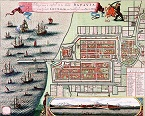

Generation 50
Time taken so far: 444.210597


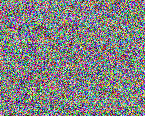

Generation 100
Time taken so far: 830.627076


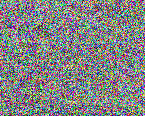

Generation 150
Time taken so far: 1220.350187


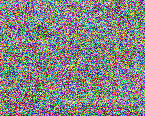

Generation 200
Time taken so far: 1612.054805


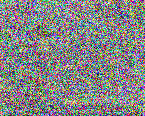

Generation 250
Time taken so far: 1980.351055


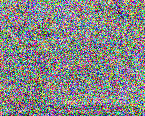

Generation 300
Time taken so far: 2329.332209


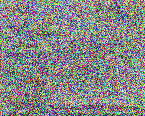

Generation 350
Time taken so far: 2686.629025


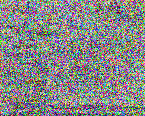

Generation 400
Time taken so far: 3042.427294


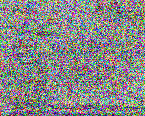

Generation 450
Time taken so far: 3388.065802


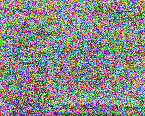

Generation 500
Time taken so far: 3738.984451


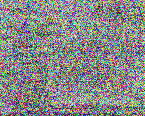

Generation 550
Time taken so far: 9762.333185


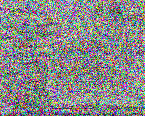

Generation 600
Time taken so far: 10119.512884


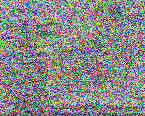

Generation 650
Time taken so far: 10472.909159


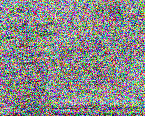

Generation 700
Time taken so far: 10823.508865


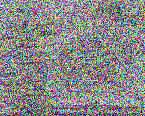

Generation 750
Time taken so far: 11176.24527


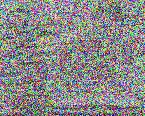

Generation 800
Time taken so far: 11524.512317


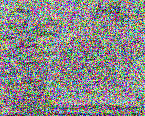

Generation 850
Time taken so far: 11881.768509


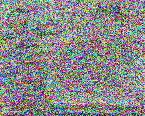

Generation 900
Time taken so far: 12236.22299


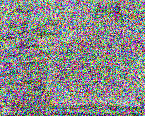

Generation 950
Time taken so far: 12590.379371


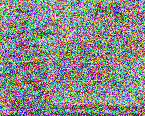

Generation 1000
Time taken so far: 12946.480426


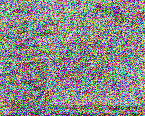

Generation 1050
Time taken so far: 44424.040522


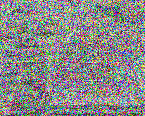

Generation 1100
Time taken so far: 44790.059436


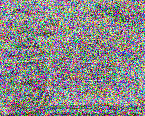

Generation 1150
Time taken so far: 45148.926067


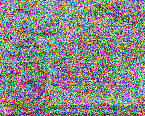

Generation 1200
Time taken so far: 45502.279791


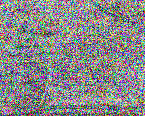

Generation 1250
Time taken so far: 45860.996859


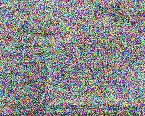

Generation 1300
Time taken so far: 46214.623311


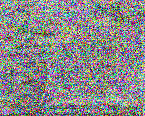

Generation 1350
Time taken so far: 46567.247212


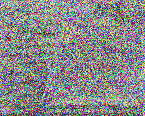

Generation 1400
Time taken so far: 49536.253621


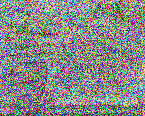

Generation 1450
Time taken so far: 49899.552337


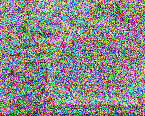

Generation 1500
Time taken so far: 50256.037206


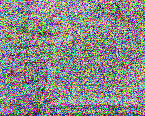

Generation 1550
Time taken so far: 50612.522161


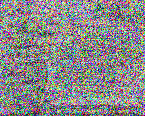

Generation 1600
Time taken so far: 50968.348783


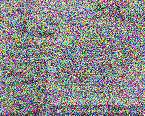

Generation 1650
Time taken so far: 51325.6141


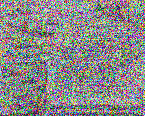

Generation 1700
Time taken so far: 51676.861969


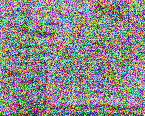

Generation 1750
Time taken so far: 52039.374592


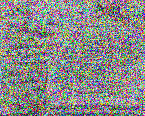

Generation 1800
Time taken so far: 52399.664064


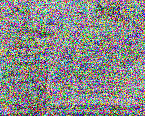

Generation 1850
Time taken so far: 52756.228051


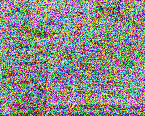

Generation 1900
Time taken so far: 53114.188354


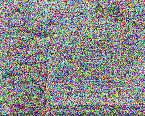

Generation 1950
Time taken so far: 53476.348762


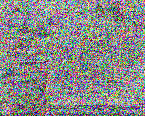

Generation 2000
Time taken so far: 53832.762


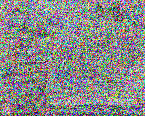

Generation 2050
Time taken so far: 54194.98777


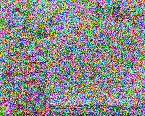

Generation 2100
Time taken so far: 54552.184287


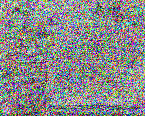

Generation 2150
Time taken so far: 54909.542386


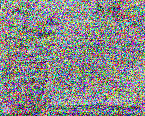

Generation 2200
Time taken so far: 55624.100793


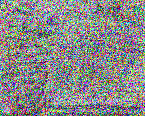

Generation 2250
Time taken so far: 55979.748604


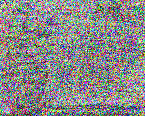

Generation 2300
Time taken so far: 56338.66874


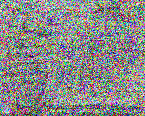

Generation 2350
Time taken so far: 56692.515075


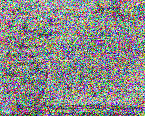

Generation 2400
Time taken so far: 57046.829037


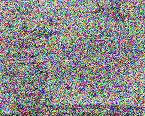

Generation 2450
Time taken so far: 57408.438739


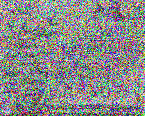

Generation 2500
Time taken so far: 57769.077787


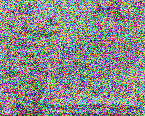

Generation 2550
Time taken so far: 58126.912478


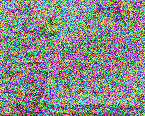

Generation 2600
Time taken so far: 58481.560362


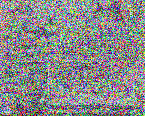

Generation 2650
Time taken so far: 58845.475351


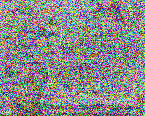

Generation 2700
Time taken so far: 59202.510965


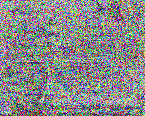

Generation 2750
Time taken so far: 59561.690216


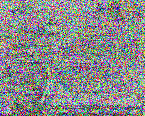

Generation 2800
Time taken so far: 59912.672169


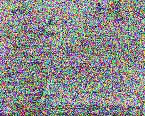

Generation 2850
Time taken so far: 60268.348718


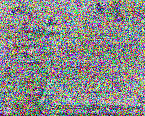

Generation 2900
Time taken so far: 60621.051001


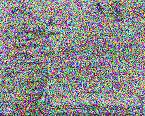

Generation 2950
Time taken so far: 60975.06652


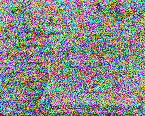

Generation 3000
Time taken so far: 61329.644115


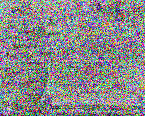

Generation 3050
Time taken so far: 61684.279905


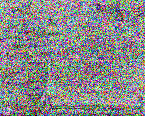

Generation 3100
Time taken so far: 62039.21135


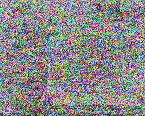

Generation 3150
Time taken so far: 62397.10096


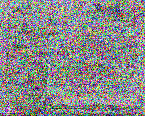

Generation 3200
Time taken so far: 62750.892109


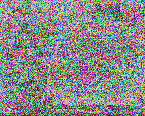

Generation 3250
Time taken so far: 63103.398972


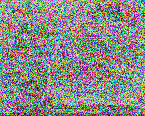

Generation 3300
Time taken so far: 63465.503991


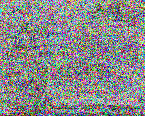

Generation 3350
Time taken so far: 63823.072156


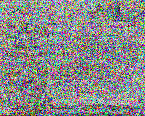

Generation 3400
Time taken so far: 64177.938719


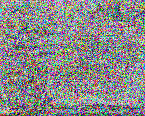

Generation 3450
Time taken so far: 64541.817221


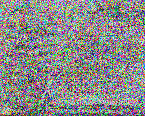

Generation 3500
Time taken so far: 64896.722948


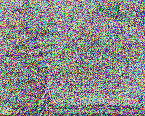

Generation 3550
Time taken so far: 65594.710204


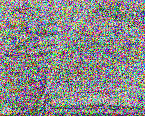

Generation 3600
Time taken so far: 65954.177786


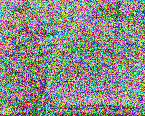

Generation 3650
Time taken so far: 66310.447462


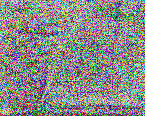

Generation 3700
Time taken so far: 66665.035252


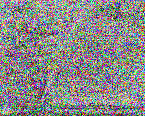

Generation 3750
Time taken so far: 67017.73767


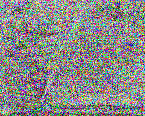

Generation 3800
Time taken so far: 67772.355357


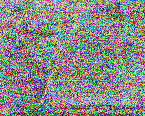

Generation 3850
Time taken so far: 68143.277068


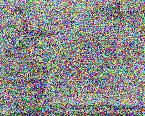

Generation 3900
Time taken so far: 68495.338986


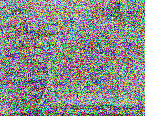

Generation 3950
Time taken so far: 81587.056031


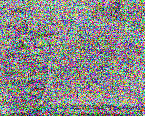

KeyboardInterrupt: 

In [205]:
# DNA = PIL.Image.fromBuffer('RGB', target.size, target.tobytes())

run()